# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
liquor = pd.read_csv(r'C:\Users\ouykh\Downloads\liquor_store_sales.csv')
liquor.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [3]:
liquor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128355 entries, 0 to 128354
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             128355 non-null  int64  
 1   Month            128355 non-null  int64  
 2   Supplier         128331 non-null  object 
 3   ItemCode         128355 non-null  object 
 4   Description      128355 non-null  object 
 5   ItemType         128354 non-null  object 
 6   RetailSales      128355 non-null  float64
 7   RetailTransfers  128355 non-null  float64
 8   WarehouseSales   128355 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 8.8+ MB


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

<AxesSubplot:xlabel='ItemType'>

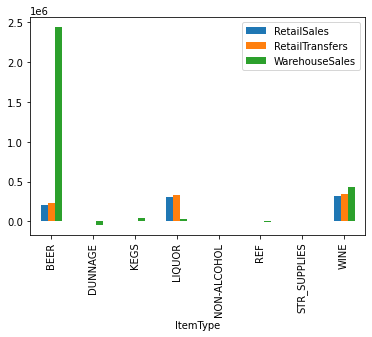

In [4]:
liquor_totals = liquor[["RetailSales","RetailTransfers","WarehouseSales","ItemType"]].groupby(["ItemType"]).agg("sum")
liquor_totals.plot.bar()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [5]:
liquor_mixsales = liquor[["RetailSales","WarehouseSales","Supplier"]].groupby(["Supplier"]).agg("sum")
liquor_mixsales['TotalSales'] = liquor_mixsales[list(liquor_mixsales.columns)].sum(axis=1)
liquor_mixsales = liquor_mixsales.drop("RetailSales",1 )
liquor_mixsales = liquor_mixsales.drop("WarehouseSales",1 )
liquor_mixsales.sort_values(by=['TotalSales'], ascending=False)
liquor_mixsales.nlargest(10,'TotalSales')

,TotalSales
Supplier,
MILLER BREWING COMPANY,607646.04
CROWN IMPORTS,606532.53
ANHEUSER BUSCH INC,536415.33
HEINEKEN USA,339735.76
E & J GALLO WINERY,143050.62
DIAGEO NORTH AMERICA INC,111909.24
CONSTELLATION BRANDS,99441.27
BOSTON BEER CORPORATION,64194.16
YUENGLING BREWERY,63433.67


<AxesSubplot:ylabel='Supplier'>

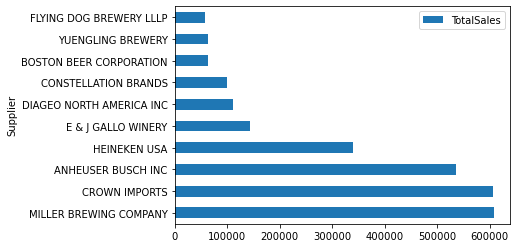

In [6]:
liquor_mixsales.nlargest(10,'TotalSales').plot.barh()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [7]:
avg_sales = liquor.groupby(['Year', 'Month']).mean()
avg_sales

RetailSales  RetailTransfers  WarehouseSales
Year Month                                              
2017 4         0.000000        15.707503        0.000000
     5         7.038838         7.421817       27.310548
     6         7.143914         6.950396       27.839069
     8         6.409991         6.584726       28.122641
     9         6.757254         6.419721       22.817909
     10        6.549021         6.827827       22.289367
     11        6.765496         7.103699       23.348862
     12        9.078241         8.353759       21.169463
2018 1         5.679413         5.574833       19.072137
     2         5.939247         6.050136       20.229658

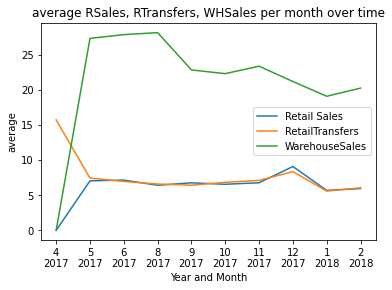

In [8]:
xticks = [f"{str(index[1])}\n{str(index[0])}" for index in 
          liquor.groupby(['Year', 'Month']).groups.keys()]
plt.plot(xticks, avg_sales["RetailSales"], label = "Retail Sales")
plt.plot(xticks, avg_sales["RetailTransfers"], label = "RetailTransfers")
plt.plot(xticks, avg_sales["WarehouseSales"], label = "WarehouseSales")
plt.title('average RSales, RTransfers, WHSales per month over time')
plt.xlabel('Year and Month')
plt.ylabel('average')
plt.legend()
plt.show()

## 4. Plot the same information as above but as a bar chart.

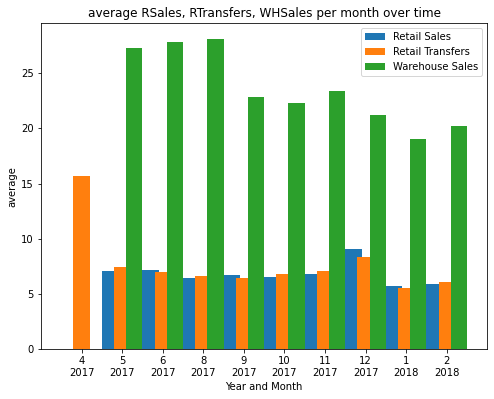

In [9]:
import numpy as np 
plt.figure(figsize=(8,6))
X = [f"{str(index[1])}\n{str(index[0])}" for index in 
          liquor.groupby(['Year', 'Month']).groups.keys()]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.3, avg_sales["RetailSales"], 0.4, label = "Retail Sales")
plt.bar(X_axis, avg_sales["RetailTransfers"], 0.4, label = "Retail Transfers")
plt.bar(X_axis + 0.3, avg_sales["WarehouseSales"], 0.4, label = "Warehouse Sales")
plt.xticks(X_axis, X)
plt.title('average RSales, RTransfers, WHSales per month over time')
plt.xlabel('Year and Month')
plt.ylabel('average')
plt.legend()
plt.show()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [10]:
RetSales = liquor.pivot_table(index=['Year', 'Month'], columns=['ItemType'], 
                        values= ['RetailSales'], aggfunc=sum)
RetSales

RetailSales                                                         \
ItemType          BEER DUNNAGE KEGS    LIQUOR NON-ALCOHOL    REF STR_SUPPLIES   
Year Month                                                                      
2017 4            0.00     NaN  NaN      0.00        0.00   0.00         0.00   
     5        25023.24     NaN  NaN  35123.36         NaN    NaN          NaN   
     6        27863.26     0.0  0.0  35035.31     1209.23  30.60        89.22   
     8        23030.13     0.0  0.0  32186.04     1091.28  19.54        77.34   
     9        23852.76     0.0  0.0  32532.32      997.11  38.88        94.64   
     10       22583.78     0.0  0.0  32491.59      945.63  22.82        84.38   
     11       23341.14     0.0  0.0  35524.77     1005.19  63.11       106.06   
     12       28822.16     0.0  0.0  49522.28     1316.44  41.21       439.64   
2018 1        16606.33     0.0  0.0  28579.87      732.25  23.66        56.94   
     2        18640.31     0.0  0.0  28852.31      812.84  41.52        47.76   

                      
ItemType        WINE  
Year Month            
2017 4          0.00  
     5      34546.89  
     6      33129.64  
     8      30707.45  
     9      32936.89  
     10     33108.76  
     11     38275.92  
     12     51492.76  
2018 1      29792.72  
     2      29409.39

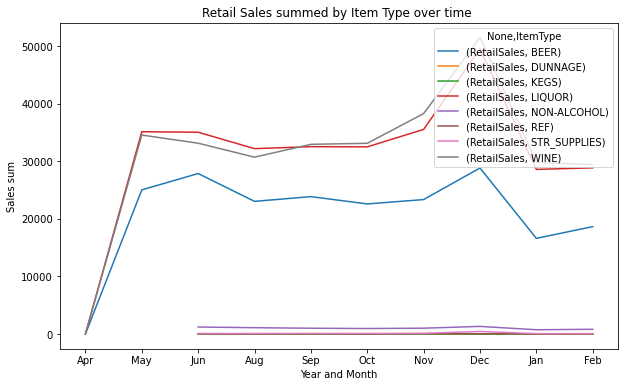

In [11]:
RetSales.plot(figsize=(10, 6))
plt.xticks(range(10), ['Apr','May','Jun','Aug','Sep','Oct','Nov','Dec','Jan','Feb'])
plt.title('Retail Sales summed by Item Type over time ')
plt.xlabel('Year and Month')
plt.ylabel('Sales sum')
plt.show()


## 6. Plot the same information as above but as a bar chart.

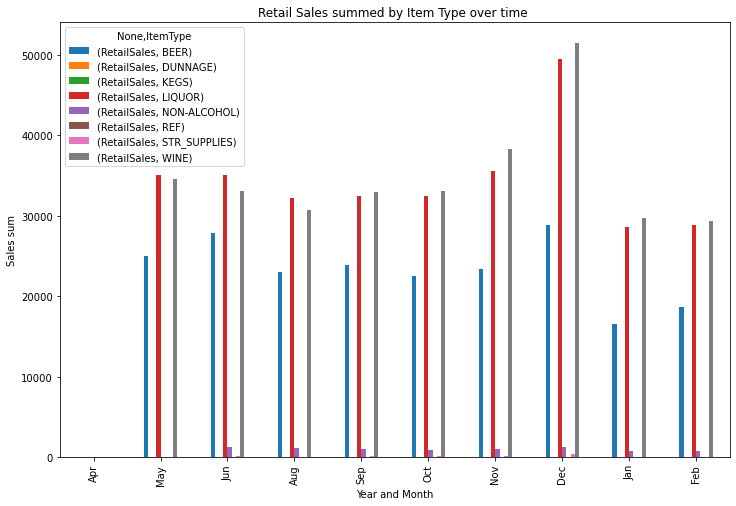

In [61]:
ax = RetSales.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(12, 8)
plt.xticks(range(10), ['Apr','May','Jun','Aug','Sep','Oct','Nov','Dec','Jan','Feb'])
plt.title('Retail Sales summed by Item Type over time ')
plt.xlabel('Year and Month')
plt.ylabel('Sales sum')
plt.show()


## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

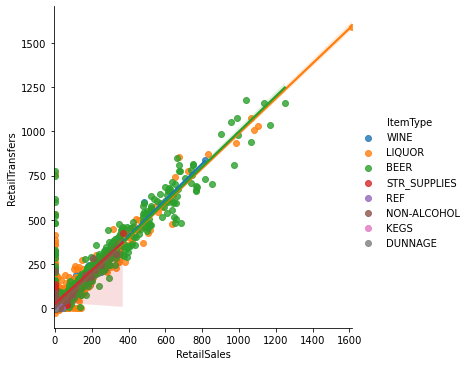

In [15]:
sns.lmplot(x="RetailSales", y="RetailTransfers", hue="ItemType", data=liquor)

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

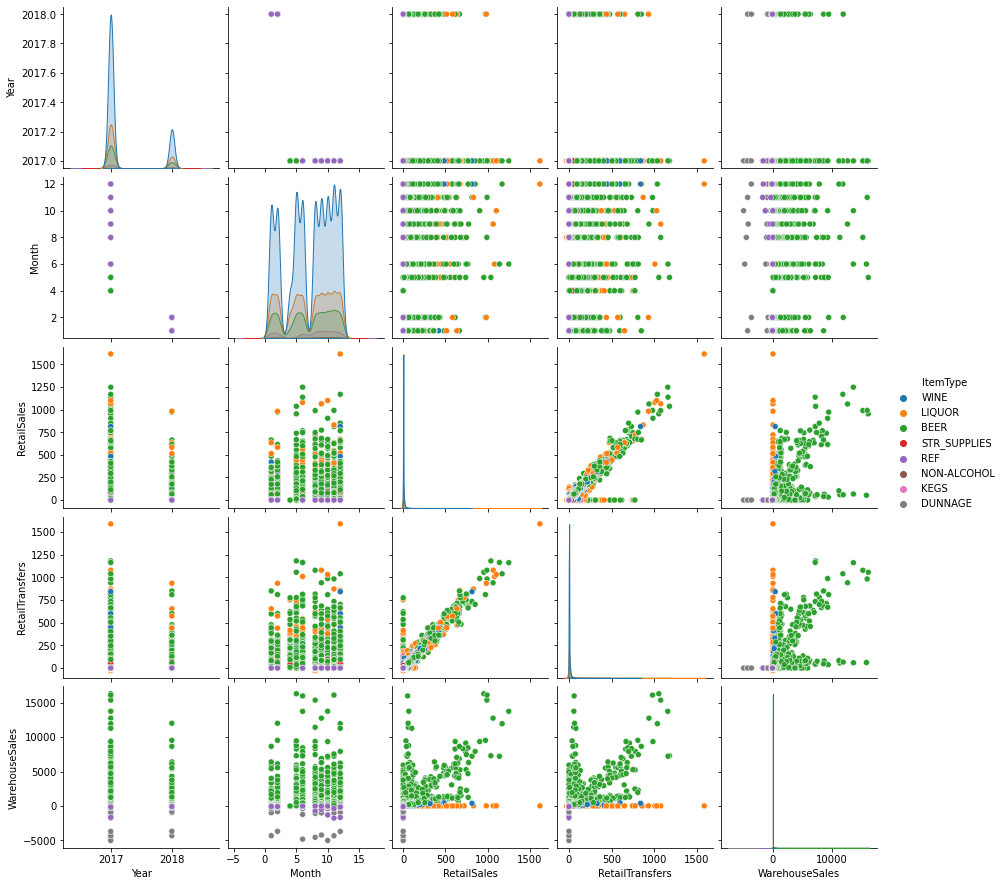

In [16]:
sns.pairplot(liquor, hue="ItemType")